In [45]:
import uproot as up
import mplhep as hep
import numpy as np
import hist
import matplotlib.pyplot as plt

In [101]:
Data = up.open("/data/submit/mori25/dark_photons_ludo/DimuonTrees/tagnprobe/PassingProbeSoftId/Probe_pt_Probe_abs_eta_Data.root")
HallData=Data['histograms']['all_nominal']
HpassData=Data['histograms']['pass_nominal']

MC = up.open("/data/submit/mori25/dark_photons_ludo/DimuonTrees/tagnprobe/PassingProbeSoftId/Probe_pt_Probe_abs_eta_MC.root")
HallMC=MC['histograms']['all_nominal']
HpassMC=MC['histograms']['pass_nominal']


In [115]:
import matplotlib.ticker as ticker
class eff2d:
    def __init__(self, hallData, hpassData, hallMC, hpassMC):
        self.hallData=hallData
        self.hpassData=hpassData
        self.hallMC=hallMC
        self.hpassMC=hpassMC


    def plot_eff(self,dataOrMC):
        if dataOrMC=="data":
            eff, err, pt, eta = self.get_eff(self.hallData,self.hpassData)
        elif dataOrMC=="MC":
            eff, err, pt, eta = self.get_eff(self.hallMC,self.hpassMC)
        else:
            print("Choose data or MC")
        # N = hist.Hist("Efficiency").Double()
        # N.fill(eta,pt,eff)
        self.plot(eff,err,pt,eta)


    def plot_SF(self):
        effData, errData, ptData, etaData = self.get_eff(self.hallData,self.hpassData)
        effMC, errMC, ptMC, etaMC = self.get_eff(self.hallMC,self.hpassMC)
        SF = effData/effMC
        err = SF*np.sqrt((errData/effData)**2 + (errMC/effMC)**2)
        self.plot(SF,err,ptData,etaData)
        return SF

        
    @staticmethod
    def get_eff(Hall,Hpass):
        hall,pt,eta = Hall.to_numpy()
        hpass,pt,eta = Hpass.to_numpy()
        eff = hpass/hall
        err = abs(eff)*np.sqrt((Hpass.errors()/hpass)**2 + (Hall.errors()/hall)**2)
        return eff, err, pt, eta
    
    @staticmethod
    def plot(w,err,x,y):
        hep.style.use("CMS")
        fig, ax = plt.subplots(figsize=(12,10))
        hep.cms.label("Preliminary",data=True,lumi=13.6)
        mesh = ax.pcolormesh(x, y, w.T, cmap="viridis")
        #add to each bin the value with the error
        print(x,y)
        for i in range(len(x)-1):
            for j in range(len(y)-1):
                ax.text(1.2*x[i],y[j]+0.1,f"{w[i,j]:.2f} $\pm$ {err[i,j]:.2f}",fontsize=10,color="black",ha="center",va="center")
        ax.set_xlabel("$p_T$")
        ax.set_ylabel("$\eta$")
        ax.set_xscale("log")
        # ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:0.0f}'.format(x)))
        # ax.set_xticks([4, 10, 20])
        # ax.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
        fig.colorbar(mesh)
        ax.legend()
        plt.show()  

[ 4.   4.4  4.9  5.5  6.2  7.3  9.5 13.  17.  25.  40. ] [0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8]


AttributeError: 'LogFormatterSciNotation' object has no attribute 'set_scientific'

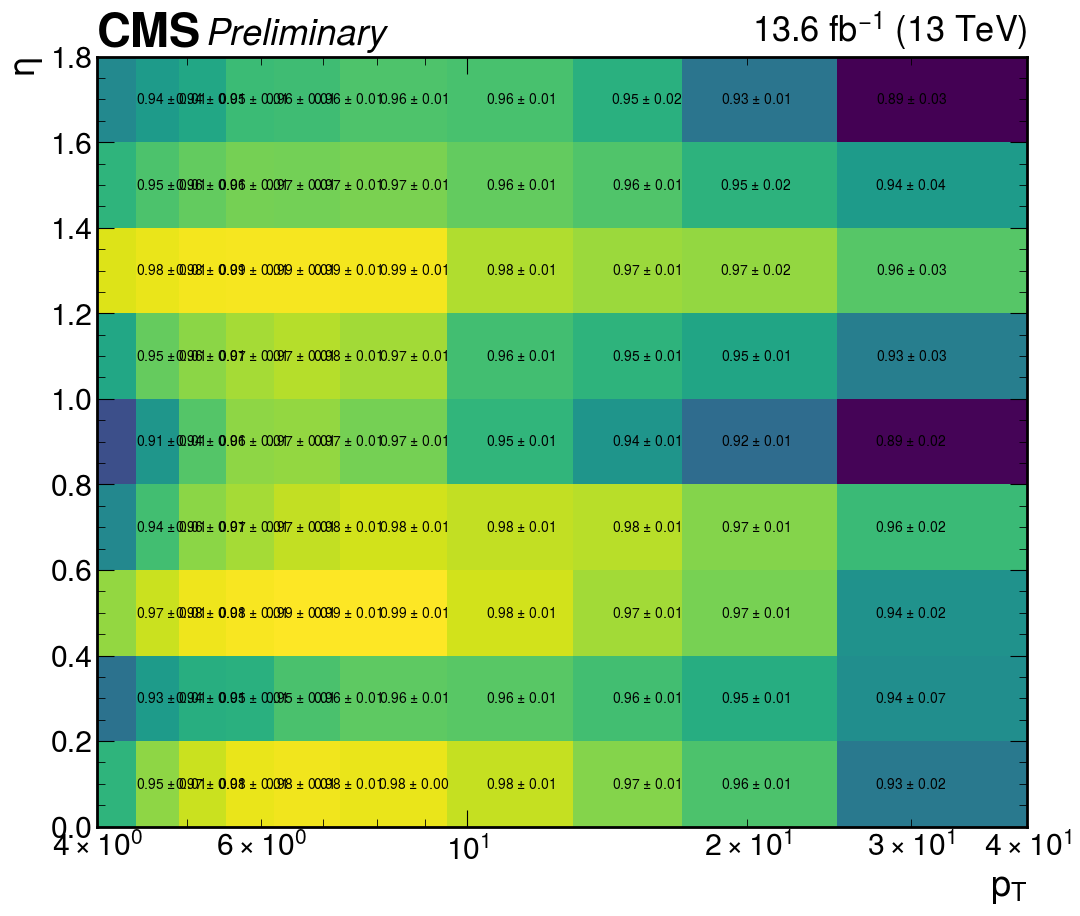

In [116]:
eff2d(HallData,HpassData,HallMC,HpassMC).plot_eff("data")
eff2d(HallData,HpassData,HallMC,HpassMC).plot_eff("MC")
sf = eff2d(HallData,HpassData,HallMC,HpassMC).plot_SF()
sf

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


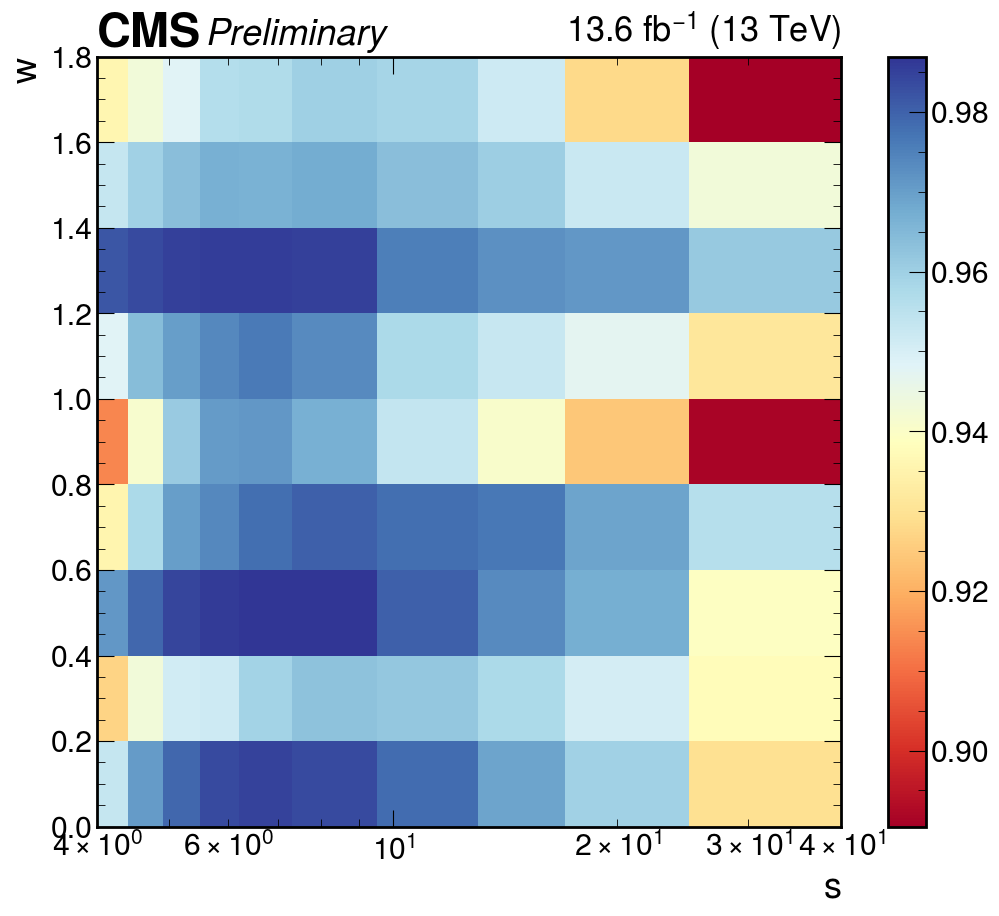

In [60]:
hep.style.use("CMS")
fig, ax = plt.subplots(figsize=(12,10))
hep.cms.label("Preliminary",data=True,lumi=13.6)
# ax.plot(0.5*(edges[:-1] + edges[1:]),histSvar,)
# ax.plot(0.5*(edges[:-1] + edges[1:]),histMCvar,)
# hist.plot.hist2dplot(eff,pt,eta)
mesh = ax.pcolormesh(pt, eta, eff.T, cmap="RdYlBu")
ax.set_xlabel("s")
ax.set_ylabel("w")
#set x axis as log
ax.set_xscale("log")
fig.colorbar(mesh)
# ax.scatter(0.5*(edges[:-1] + edges[1:]),weight_hist,)
ax.legend()
